In [1]:
import tweepy
import matplotlib.pyplot as plt
from  textblob import TextBlob 
import time
import re
import pandas as pd
from textblob import TextBlob
import numpy as np

In [2]:
# all 4 authentication keys to access twitter API
# to connect as OAth handler or jump serever / revers proxy server
consumer_key = "0rrmLyKVH5qKhRFXiE0XeqQHg"
consumer_sec = "84JLcoHcmhtUTJxQj1TNo0HzeNRh9V7CqiRazadJt7HUYxHsvs"

# from proxy server we need to connect
access_token = "3299723720-TSLpnSggT1JkEyF5JFFlPiiepNq0l4CNnibbRUI"
access_token_sec = "GEFxpxlZBS2MDeOAF2BpdSyvKzYAWgPqG5I2CouV9Wk7b"


In [3]:
# connected to jump server of twitter
auth=tweepy.OAuthHandler(consumer_key,consumer_sec)

In [4]:
# now we can connect from jump server to web server of twitter
auth.set_access_token(access_token,access_token_sec)

In [5]:
# now we can connect to API storge server of twitter
api_connect=tweepy.API(auth)

In [6]:
# now you can search any topic on twitter
tweet_data=api_connect.search_tweets('health',count=100)

In [7]:
df = pd.DataFrame(columns=('text', 'sentiment'))
# Remove duplicates
# df.sort_values("text", inplace = True) 
# df.drop_duplicates(subset ="text", keep = False, inplace = True) 

In [8]:
for tweet in tweet_data:
    sentimentText = TextBlob(tweet.text)
    df = df.append({'text': re.sub(r'http\S+', '', tweet.text),
                    'sentiment': sentimentText.sentiment.polarity},
                   ignore_index=True)

In [9]:
df.shape

(100, 2)

In [10]:
df.head()

,text,sentiment
0,RT @winwin_message_: [220211] {9.45 PM CST} \n...,0.175
1,RT @LauraMiers: We aren’t going to hear about ...,0.000
2,My husband is always sending me videos on diff...,0.000
3,Lung-health startup Respira Labs inhales $2.8M...,0.000
4,RT @plbdkb69: MABEL #131574 WAS ON DEPT OF HEA...,0.000


In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [12]:
df['Clean_text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [13]:
# remove special characters, numbers, punctuations
df['Clean_text'] = df['Clean_text'].str.replace("[^a-zA-Z#]", " ")

In [14]:
df['Clean_text'] = df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
tokenized_tweet = df['Clean_text'].apply(lambda x: x.split())

In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#winwin, hope, that, everyth, goe, smoothli, ...
1    [aren, go, hear, about, public, health, threat...
2    [husband, alway, send, video, diff, way, reduc...
3    [lung, health, startup, respira, lab, inhal, h...
4    [mabel, dept, health, hold, kill, list, wait, ...
Name: Clean_text, dtype: object

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Clean_text'] = tokenized_tweet

In [18]:
df.loc[:,('text','Clean_text')]

,text,Clean_text
0,RT @winwin_message_: [220211] {9.45 PM CST} \n...,#winwin hope that everyth goe smoothli good lu...
1,RT @LauraMiers: We aren’t going to hear about ...,aren go hear about public health threat that i...
2,My husband is always sending me videos on diff...,husband alway send video diff way reduc stress...
3,Lung-health startup Respira Labs inhales $2.8M...,lung health startup respira lab inhal help res...
4,RT @plbdkb69: MABEL #131574 WAS ON DEPT OF HEA...,mabel dept health hold kill list wait found br...
...,...,...
95,The Magic of Bee Venom Destroys Cancer Cells |...,magic venom destroy cancer cell natur real health
96,RT @eieijisho: nutrition; the food that you ea...,nutrit food that that affect your health
97,There has been a better way for you to get in ...,there been better shape have energi love your ...
98,RT @LfcJmr: Australia has fallen!\n\nKILLED fo...,australia fallen kill follow covid regul that ...


In [19]:
df[df.text.isnull()]

,text,sentiment,Clean_text


In [20]:
df[df.Clean_text.isnull()]

,text,sentiment,Clean_text


In [21]:
# Number of unique tweets
unique_clean_text = df.Clean_text.unique()
unique_text = df.text.unique()
print(len(unique_clean_text))
print(len(unique_text))
print(len(df))

90
90
100


In [22]:
df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)

In [23]:
df.reset_index(drop=True,inplace=True)

In [24]:
df['Clean_text_length'] = df['Clean_text'].apply(len)
df.head()

,text,sentiment,Clean_text,Clean_text_length
0,RT @winwin_message_: [220211] {9.45 PM CST} \n...,0.175,#winwin hope that everyth goe smoothli good lu...,70
1,RT @LauraMiers: We aren’t going to hear about ...,0.000,aren go hear about public health threat that i...,83
2,My husband is always sending me videos on diff...,0.000,husband alway send video diff way reduc stress...,75
3,Lung-health startup Respira Labs inhales $2.8M...,0.000,lung health startup respira lab inhal help res...,85
4,RT @plbdkb69: MABEL #131574 WAS ON DEPT OF HEA...,0.000,mabel dept health hold kill list wait found br...,63


In [25]:
df[df['Clean_text_length']==0]['Clean_text'] ## Looks like these are tweets with different languages or just hastags.
# We can simply drop these tweets
list = df[df['Clean_text_length']==0]['Clean_text'].index
list

Int64Index([], dtype='int64')

In [26]:
df.drop(index = list,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               90 non-null     object 
 1   sentiment          90 non-null     float64
 2   Clean_text         90 non-null     object 
 3   Clean_text_length  90 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


In [28]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               90 non-null     object 
 1   sentiment          90 non-null     float64
 2   Clean_text         90 non-null     object 
 3   Clean_text_length  90 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [29]:
def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

In [30]:
def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [31]:
s = pd.DataFrame(index = range(0,len(df)),columns= ['sentiment'])
pos=0
neg=0
neu=0
for i in range(0,len(df)): 
    
    if (df['sentiment'][i] < 0):
        s['sentiment'][i] = 'Negative' 
        neg=neg+1
    if (df['sentiment'] [i]>= 0):
        s['sentiment'][i] = 'Positive'
        pos=pos+1
    #if ((df['tweet_sentiment'][i] >= -0.05) | (df['tweet_sentiment'] <= 0.05)):
#     else:
#         s['sentiment'][i] = 'Neutral'
    
df['sentiment'] = s['sentiment']
df

,text,sentiment,Clean_text,Clean_text_length
0,RT @winwin_message_: [220211] {9.45 PM CST} \n...,Positive,#winwin hope that everyth goe smoothli good lu...,70
1,RT @LauraMiers: We aren’t going to hear about ...,Positive,aren go hear about public health threat that i...,83
2,My husband is always sending me videos on diff...,Positive,husband alway send video diff way reduc stress...,75
3,Lung-health startup Respira Labs inhales $2.8M...,Positive,lung health startup respira lab inhal help res...,85
4,RT @plbdkb69: MABEL #131574 WAS ON DEPT OF HEA...,Positive,mabel dept health hold kill list wait found br...,63
...,...,...,...,...
85,The Magic of Bee Venom Destroys Cancer Cells |...,Positive,magic venom destroy cancer cell natur real health,49
86,RT @eieijisho: nutrition; the food that you ea...,Positive,nutrit food that that affect your health,40
87,There has been a better way for you to get in ...,Positive,there been better shape have energi love your ...,57
88,RT @LfcJmr: Australia has fallen!\n\nKILLED fo...,Negative,australia fallen kill follow covid regul that ...,69


In [94]:
df.to_csv('sentiment_analysis.csv')


In [95]:
df.isnull().sum()

text                 0
sentiment            1
Clean_text           0
Clean_text_length    0
dtype: int64

In [96]:
df.dropna(inplace=True)

In [97]:
df.isnull().sum()

text                 0
sentiment            0
Clean_text           0
Clean_text_length    0
dtype: int64

In [98]:
df.sentiment.value_counts()

Neutral     41
Positive    33
Negative    12
Name: sentiment, dtype: int64

In [99]:
df['sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sentiment_id']=le.fit_transform(df['sentiment'])

In [101]:
df.head()

,text,sentiment,Clean_text,Clean_text_length,sentiment_id
0,🚨 COME MEET the Seanadóir for Meath (ME) at Gl...,Positive,come meet seanad meath glaslough gregg today w...,67,2
1,The Fight for The Throne: A DuBredo Fanfic\nTa...,Negative,fight throne dubredo fanfic tag sara dutert le...,85,0
2,"RT @Shehzad_Ind: Soon after its swearing-in, t...",Positive,soon after swear govt uttarakhand will form co...,84,2
3,Foreign policy is one of those areas where it ...,Positive,foreign polici those area where best avoid ide...,72,2
4,"""Halálos világjárvány idején a családok millió...",Neutral,idej csal milli inak lelm korm nybuktat kihasz...,54,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000122BAD99648>,
      dtype=object)

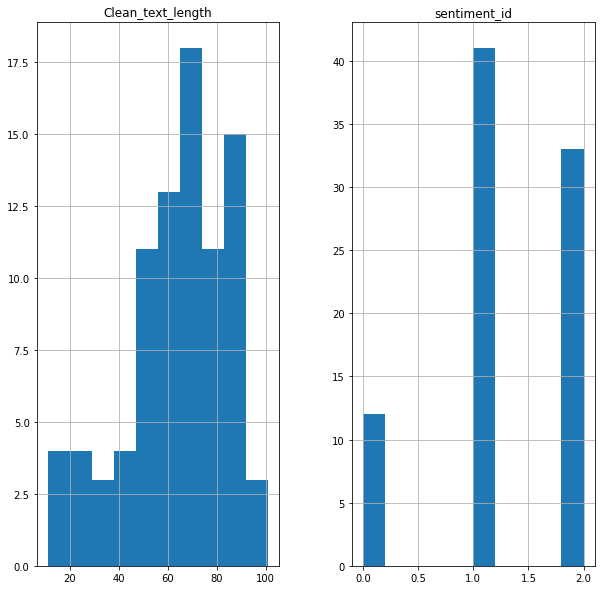

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(10,10))

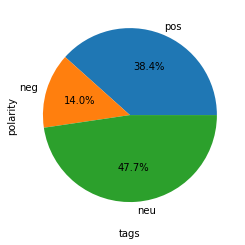

In [103]:
# ploting graphs
plt.xlabel("tags")
plt.ylabel("polarity")
#plt.bar(['pos','neg','neu'],[pos,neg,neu])
plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct="%1.1f%%")
plt.show()

<BarContainer object of 3 artists>

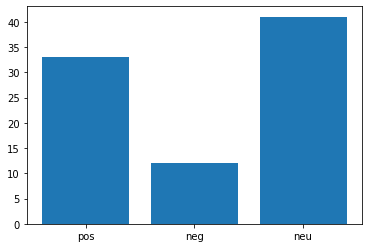

In [104]:
plt.bar(['pos','neg','neu'],[pos,neg,neu])